# Main points and summary of the work

1) The first step, I went through the consecutive curtailment blocks, calculated the total curtailed energy per block, counted the number of rows (hours) in each block, and visualized the relationship between block size and total curtailment using a bar graph.

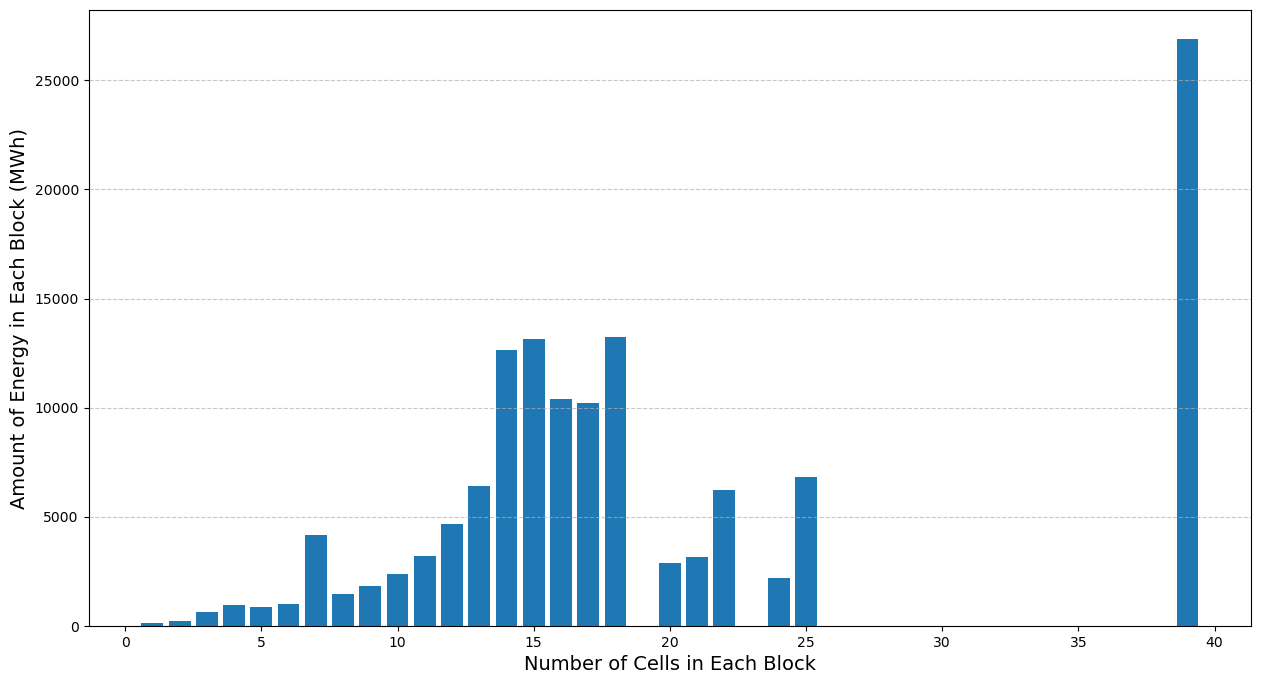

Number of blocks: 919
Details of all blocks:
Block_ID
2       3.190600e+03
4       1.140000e-13
6       4.147800e+03
8       7.216000e+02
10      9.090000e-13
            ...     
1830    3.431800e+03
1832    7.110000e-15
1834    7.110000e-15
1836    7.181300e+03
1838    4.292100e+03
Name: I3DIA03, Length: 919, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Step 8: Calculate the number of cells (rows) in each block
block_sizes = curtailment_blocks.groupby('Block_ID').size()

# Step 9: Plot the bar graph
plt.figure(figsize=(15, 8))
plt.bar(block_sizes, block_totals)

# Step 10: Customize the plot
plt.xlabel('Number of Cells in Each Block', fontsize=14)
plt.ylabel('Amount of Energy in Each Block (MWh)', fontsize=14)
plt.title('', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 11: Show the plot
plt.show()

# Optional: Print block statistics
print(f"Number of blocks: {len(block_totals)}")
print("Details of all blocks:")
print(block_totals)

2) After that I calculated the total programmed curtailment, the mean curtailment per block, and the number of curtailment blocks, providing an overall statistical summary of energy curtailment.

In [2]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
curt_data = pd.read_csv(file_path)

# Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Calculate the mean value of all blocks
mean_curtailment_block = block_totals.mean()

# Print results
print(f"The total programmed curtailment for all blocks is: {block_totals.sum()} MWh")
print(f"The mean value of programmed curtailment per block is: {mean_curtailment_block} MWh")
print(f"Number of blocks: {len(block_totals)}")

# Optional: Print details of all blocks
print("Details of all blocks:")
print(block_totals)


The total programmed curtailment for all blocks is: 2116927.1000000006 MWh
The mean value of programmed curtailment per block is: 2303.511534276388 MWh
Number of blocks: 919
Details of all blocks:
Block_ID
2       3.190600e+03
4       1.140000e-13
6       4.147800e+03
8       7.216000e+02
10      9.090000e-13
            ...     
1830    3.431800e+03
1832    7.110000e-15
1834    7.110000e-15
1836    7.181300e+03
1838    4.292100e+03
Name: I3DIA03, Length: 919, dtype: float64


3) Then I went for the median and standard deviation of the total programmed curtailment for each block to analyze the distribution and variability of curtailed energy.

In [3]:
import pandas as pd

file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Step 8: Calculate median and standard deviation
median_curtailment = block_totals.median()
std_dev_curtailment = block_totals.std()

# Step 9: Print results
print(f"Median programmed curtailment per block: {median_curtailment} MWh")
print(f"Standard deviation of programmed curtailment per block: {std_dev_curtailment} MWh")

Median programmed curtailment per block: 1503.7 MWh
Standard deviation of programmed curtailment per block: 2629.308116418665 MWh


4) I found the block with the maximum programmed curtailment, calculated its total curtailed energy, and determined the time range during which it occurs.

In [4]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
curt_data = pd.read_csv(file_path)

# Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Find the block with the maximum curtailment
max_block_id = block_totals.idxmax()
max_block_value = block_totals.max()

# Filter the data to find the time range of the block with the maximum curtailment
max_block_data = curtailment_blocks[curtailment_blocks['Block_ID'] == max_block_id]
max_block_start = max_block_data['new_index'].min()
max_block_end = max_block_data['new_index'].max()

# Print the results
print(f"The maximum programmed curtailment is: {max_block_value} MWh")
print(f"It occurs during the block from {max_block_start} to {max_block_end}")

The maximum programmed curtailment is: 26895.9 MWh
It occurs during the block from 2024-05-30 06:00:00 to 2024-05-31 20:00:00


5) I analyzed the hourly distribution of curtailment block starts, counting how often blocks begin at each hour of the day and visualizing the results in a bar chart.

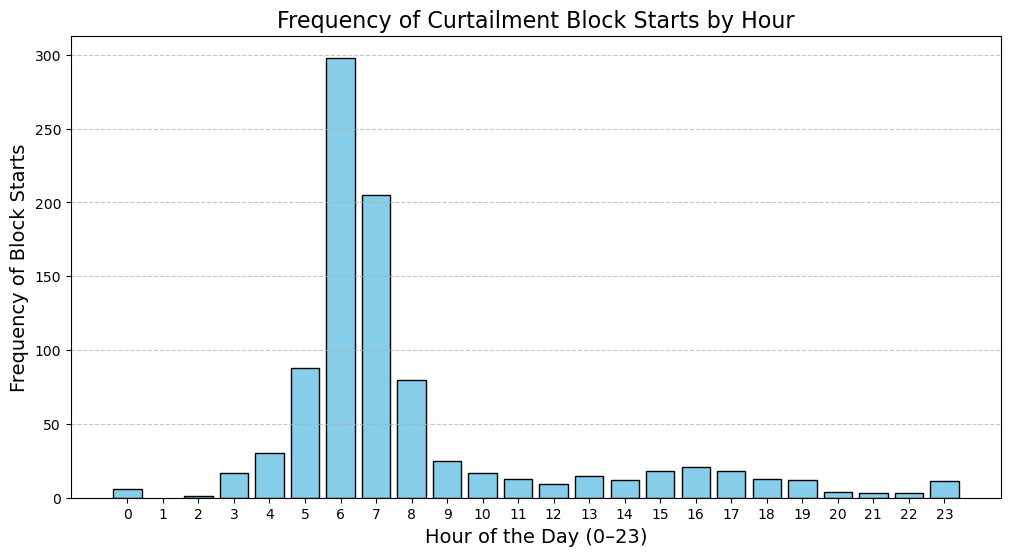

Frequency of block starts by hour:
0       6
2       1
3      17
4      30
5      88
6     298
7     205
8      80
9      25
10     17
11     13
12      9
13     15
14     12
15     18
16     21
17     18
18     13
19     12
20      4
21      3
22      3
23     11
Name: new_index, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Extract the starting hour of each block
block_start_hours = curtailment_blocks.groupby('Block_ID')['new_index'].min().dt.hour

# Step 8: Count the frequency of block starts for each hour
hourly_frequencies = block_start_hours.value_counts().sort_index()

# Step 9: Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(hourly_frequencies.index, hourly_frequencies.values, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day (0–23)', fontsize=14)
plt.ylabel('Frequency of Block Starts', fontsize=14)
plt.title('Frequency of Curtailment Block Starts by Hour', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))  # Ensure all hours (0–23) are shown
plt.show()

# Step 10: Print the results
print("Frequency of block starts by hour:")
print(hourly_frequencies)

6) the total curtailment per block and visualizes the energy distribution over time, sorting blocks chronologically and plotting their energy amounts.

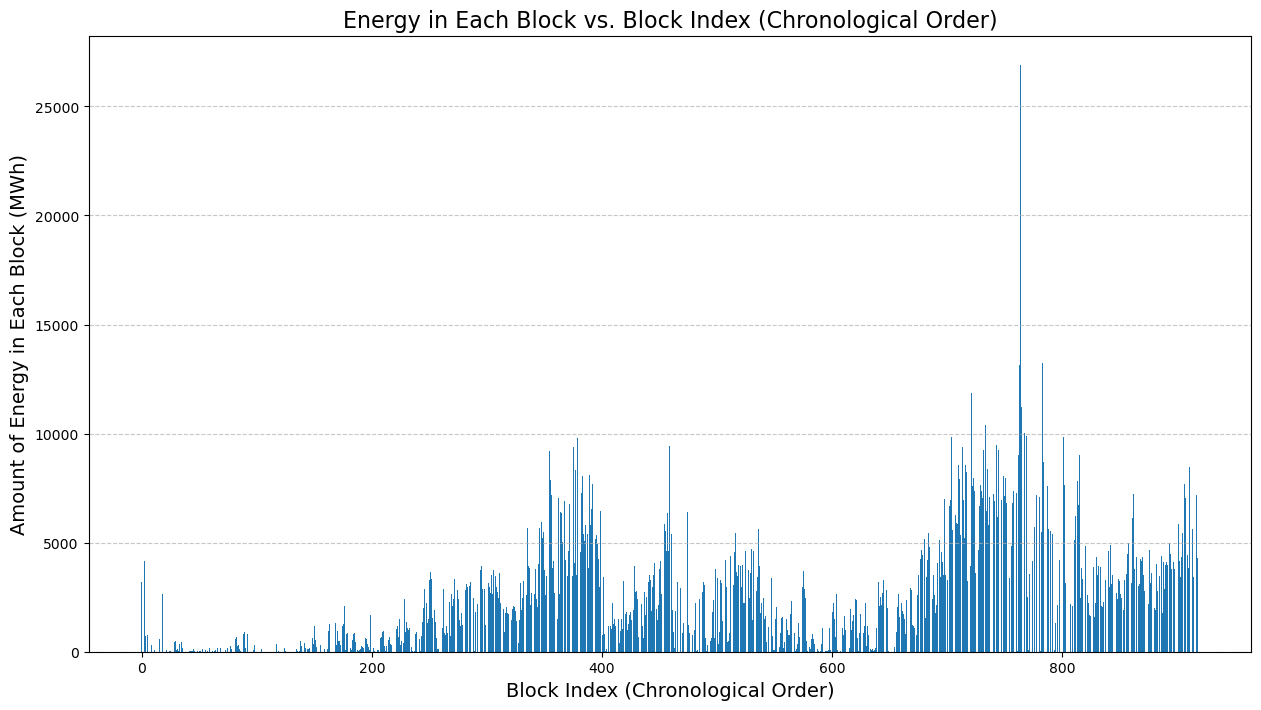

Number of blocks: 919
Details of all blocks in chronological order:
          Total_Curtailment          Start_Time
Block_ID                                       
2              3.190600e+03 2022-10-01 07:00:00
4              1.140000e-13 2022-10-02 07:00:00
6              4.147800e+03 2022-10-02 10:00:00
8              7.216000e+02 2022-10-03 10:00:00
10             9.090000e-13 2022-10-04 09:00:00
...                     ...                 ...
1830           3.431800e+03 2024-09-28 06:00:00
1832           7.110000e-15 2024-09-28 23:00:00
1834           7.110000e-15 2024-09-29 04:00:00
1836           7.181300e+03 2024-09-29 06:00:00
1838           4.292100e+03 2024-09-30 05:00:00

[919 rows x 2 columns]


In [6]:
# Step 1: Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  # Update this path if needed
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Calculate the total curtailment and the earliest timestamp for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()
block_start_times = curtailment_blocks.groupby('Block_ID')['new_index'].min()

# Step 8: Combine totals and start times into a DataFrame and sort by time
block_info = pd.DataFrame({'Total_Curtailment': block_totals, 'Start_Time': block_start_times})
block_info = block_info.sort_values(by='Start_Time')

# Step 9: Plot the bar graph
plt.figure(figsize=(15, 8))
plt.bar(range(len(block_info)), block_info['Total_Curtailment'])

# Step 10: Customize the plot
plt.xlabel('Block Index (Chronological Order)', fontsize=14)
plt.ylabel('Amount of Energy in Each Block (MWh)', fontsize=14)
plt.title('Energy in Each Block vs. Block Index (Chronological Order)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 11: Show the plot
plt.show()

# Optional: Print block statistics
print(f"Number of blocks: {len(block_totals)}")
print("Details of all blocks in chronological order:")
print(block_info)

7) calculated the storage capacity required to store different percentages (50% to 100%) of curtailment blocks, based on block size distribution.

In [7]:
import pandas as pd

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Step 8: Sort blocks by size
sorted_blocks = block_totals.sort_values()

# Step 9: Determine the number of blocks for each percentage
num_blocks = len(sorted_blocks)
percentages = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Percentages to calculate
storage_capacities = {}

for perc in percentages:
    num_blocks_subset = int(num_blocks * perc)
    storage_capacity = sorted_blocks.iloc[:num_blocks_subset].max()
    storage_capacities[int(perc * 100)] = storage_capacity

# Print the results
print(f"Total number of blocks: {num_blocks}")
for perc, capacity in storage_capacities.items():
    print(f"Storage capacity required to store {perc}% of the blocks: {capacity} MWh")

Total number of blocks: 919
Storage capacity required to store 50% of the blocks: 1495.4 MWh
Storage capacity required to store 60% of the blocks: 2264.4 MWh
Storage capacity required to store 70% of the blocks: 3139.0 MWh
Storage capacity required to store 80% of the blocks: 4011.5 MWh
Storage capacity required to store 90% of the blocks: 5857.3 MWh
Storage capacity required to store 100% of the blocks: 26895.9 MWh


8) Again, I calculated the storage capacity required to store different percentages (50% to 100%) of curtailment blocks, after removing the largest block to prevent extreme values from skewing the results.

In [8]:
# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  # Update with your file path
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment (I3DIA03 > 0)
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0

# Step 5: Create a block ID to group consecutive hours of curtailment
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 6: Filter only the blocks with curtailment (I3DIA03 > 0)
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]

# Step 7: Calculate the total curtailment for each block
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Step 8: Eliminate the largest block
block_totals = block_totals[block_totals < block_totals.max()]

# Step 9: Sort blocks by size
sorted_blocks = block_totals.sort_values()

# Step 10: Determine the number of blocks for each percentage
num_blocks = len(sorted_blocks)
percentages = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Percentages to calculate
storage_capacities = {}

for perc in percentages:
    num_blocks_subset = int(num_blocks * perc)
    storage_capacity = sorted_blocks.iloc[:num_blocks_subset].max()
    storage_capacities[int(perc * 100)] = storage_capacity

# Print the results
print(f"Total number of blocks (after removing the largest block): {num_blocks}")
for perc, capacity in storage_capacities.items():
    print(f"Storage capacity required to store {perc}% of the blocks: {capacity} MWh")


Total number of blocks (after removing the largest block): 918
Storage capacity required to store 50% of the blocks: 1495.4 MWh
Storage capacity required to store 60% of the blocks: 2255.4 MWh
Storage capacity required to store 70% of the blocks: 3133.1 MWh
Storage capacity required to store 80% of the blocks: 3998.1 MWh
Storage capacity required to store 90% of the blocks: 5851.4 MWh
Storage capacity required to store 100% of the blocks: 13219.2 MWh


9) I started analyzing the price contribution by finding  the trend of daily electricity prices over time, using linear regression to calculate a trend line and visualize the price fluctuations with a plotted trend.

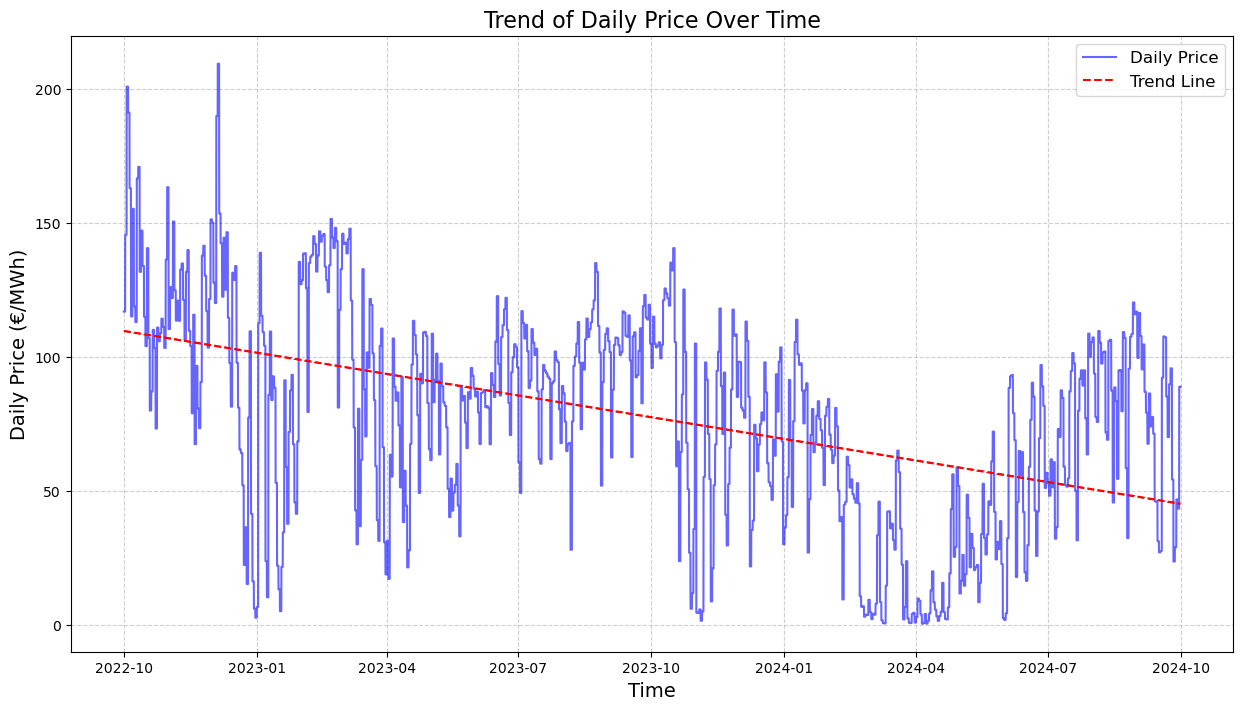

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Prepare data for trend line calculation
# Convert time to ordinal numbers for regression
curt_data['time_ordinal'] = curt_data['new_index'].map(lambda x: x.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    curt_data['time_ordinal'], curt_data['dayly_price']
)

# Calculate trend line values
curt_data['trend_line'] = intercept + slope * curt_data['time_ordinal']

# Step 4: Plot the daily price with the trend line
plt.figure(figsize=(15, 8))
plt.plot(curt_data['new_index'], curt_data['dayly_price'], label='Daily Price', color='blue', alpha=0.6)
plt.plot(curt_data['new_index'], curt_data['trend_line'], label='Trend Line', color='red', linestyle='--')

# Add labels, title, and grid
plt.xlabel('Time', fontsize=14)
plt.ylabel('Daily Price (€/MWh)', fontsize=14)
plt.title('Trend of Daily Price Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.show()

10) Then the discharge of stored energy from 4-hour Li-ion batteries and calculating the total revenue generated for different storage capacities (50% to 100%) based on hourly electricity prices.

In [10]:
import pandas as pd

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 5: Filter only blocks with curtailment and calculate total curtailment per block
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Define storage capacities for analysis (MWh)
storage_capacities = [1495.4, 2264.4, 3139.0, 4011.5, 5857.3, 26895.9]  # 50% to 100% capacities

# Initialize results summary
results_summary = []

# Iterate through storage capacities
for battery_capacity in storage_capacities:
    discharge_rate = battery_capacity / 4  # Discharge rate (MW) for 4-hour battery
    stored_energy = block_totals.clip(upper=battery_capacity)  # Cap stored energy to battery capacity
    total_revenue = 0
    block_results = []

    for block_id, energy in stored_energy.items():
        # Get the block's end time
        block_data = curtailment_blocks[curtailment_blocks['Block_ID'] == block_id]
        end_time = block_data['new_index'].max()

        # Discharge starts the hour after the block ends
        discharge_start = end_time + pd.Timedelta(hours=1)
        revenue = 0

        # Distribute discharge over 4 hours
        hourly_discharge = min(discharge_rate, energy / 4)
        for i in range(4):
            discharge_time = discharge_start + pd.Timedelta(hours=i)
            price = curt_data[curt_data['new_index'] == discharge_time]['price'].mean()
            if pd.notna(price):
                revenue += hourly_discharge * price
        
        # Append block results
        block_results.append({
            "Block_ID": block_id,
            "Stored_Energy (MWh)": energy,
            "Discharge_Start": discharge_start,
            "Revenue (€)": revenue
        })
        total_revenue += revenue

    # Append capacity results
    results_summary.append({
        "Battery_Capacity (MWh)": battery_capacity,
        "Total_Revenue (€)": total_revenue,
        "Block_Results": block_results
    })

# Convert summary to a DataFrame
summary_df = pd.DataFrame({
    "Battery_Capacity (MWh)": [result["Battery_Capacity (MWh)"] for result in results_summary],
    "Total_Revenue (€)": [result["Total_Revenue (€)"] for result in results_summary]
})

# Display summary results
print("Revenue Analysis for Different Battery Capacities:")
print(summary_df)

# Optional: Save results to a CSV file
summary_df.to_csv("battery_revenue_analysis.csv", index=False)


Revenue Analysis for Different Battery Capacities:
   Battery_Capacity (MWh)  Total_Revenue (€)
0                  1495.4       7.924601e+07
1                  2264.4       1.082311e+08
2                  3139.0       1.331578e+08
3                  4011.5       1.496402e+08
4                  5857.3       1.683407e+08
5                 26895.9       1.815120e+08


11) Then the discharge of stored energy from 4-hour Li-ion batteries and calculates the total revenue generated for different storage capacities (50% to 100%) based on hourly electricity prices again after removing the largest block to prevent extreme values from skewing the results.

In [11]:
import pandas as pd

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 5: Filter only blocks with curtailment and calculate total curtailment per block
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Define storage capacities for analysis (MWh)
storage_capacities = [1495.4, 2255.4, 3133.1, 3998.1, 5851.4, 13219.2]  # 50% to 100% capacities

# Initialize results summary
results_summary = []

# Iterate through storage capacities
for battery_capacity in storage_capacities:
    discharge_rate = battery_capacity / 4  # Discharge rate (MW) for 4-hour battery
    stored_energy = block_totals.clip(upper=battery_capacity)  # Cap stored energy to battery capacity
    total_revenue = 0
    block_results = []

    for block_id, energy in stored_energy.items():
        # Get the block's end time
        block_data = curtailment_blocks[curtailment_blocks['Block_ID'] == block_id]
        end_time = block_data['new_index'].max()

        # Discharge starts the hour after the block ends
        discharge_start = end_time + pd.Timedelta(hours=1)
        revenue = 0

        # Distribute discharge over 4 hours
        hourly_discharge = min(discharge_rate, energy / 4)
        for i in range(4):
            discharge_time = discharge_start + pd.Timedelta(hours=i)
            price = curt_data[curt_data['new_index'] == discharge_time]['price'].mean()
            if pd.notna(price):
                revenue += hourly_discharge * price
        
        # Append block results
        block_results.append({
            "Block_ID": block_id,
            "Stored_Energy (MWh)": energy,
            "Discharge_Start": discharge_start,
            "Revenue (€)": revenue
        })
        total_revenue += revenue

    # Append capacity results
    results_summary.append({
        "Battery_Capacity (MWh)": battery_capacity,
        "Total_Revenue (€)": total_revenue,
        "Block_Results": block_results
    })

# Convert summary to a DataFrame
summary_df = pd.DataFrame({
    "Battery_Capacity (MWh)": [result["Battery_Capacity (MWh)"] for result in results_summary],
    "Total_Revenue (€)": [result["Total_Revenue (€)"] for result in results_summary]
})

# Display summary results
print("Revenue Analysis for Different Battery Capacities:")
print(summary_df)

# Optional: Save results to a CSV file
summary_df.to_csv("battery_revenue_analysis.csv", index=False)


Revenue Analysis for Different Battery Capacities:
   Battery_Capacity (MWh)  Total_Revenue (€)
0                  1495.4       7.924601e+07
1                  2255.4       1.079337e+08
2                  3133.1       1.330174e+08
3                  3998.1       1.494377e+08
4                  5851.4       1.683024e+08
5                 13219.2       1.814539e+08


12) analyzing the relationship between curtailment block size, duration, and revenue, calculating correlations and linear regressions while visualizing these relationships using scatter plots with regression lines.

Correlation between Block Size and Revenue: 0.5721759649630952
Correlation between Block Duration and Revenue: 0.5311073204158265


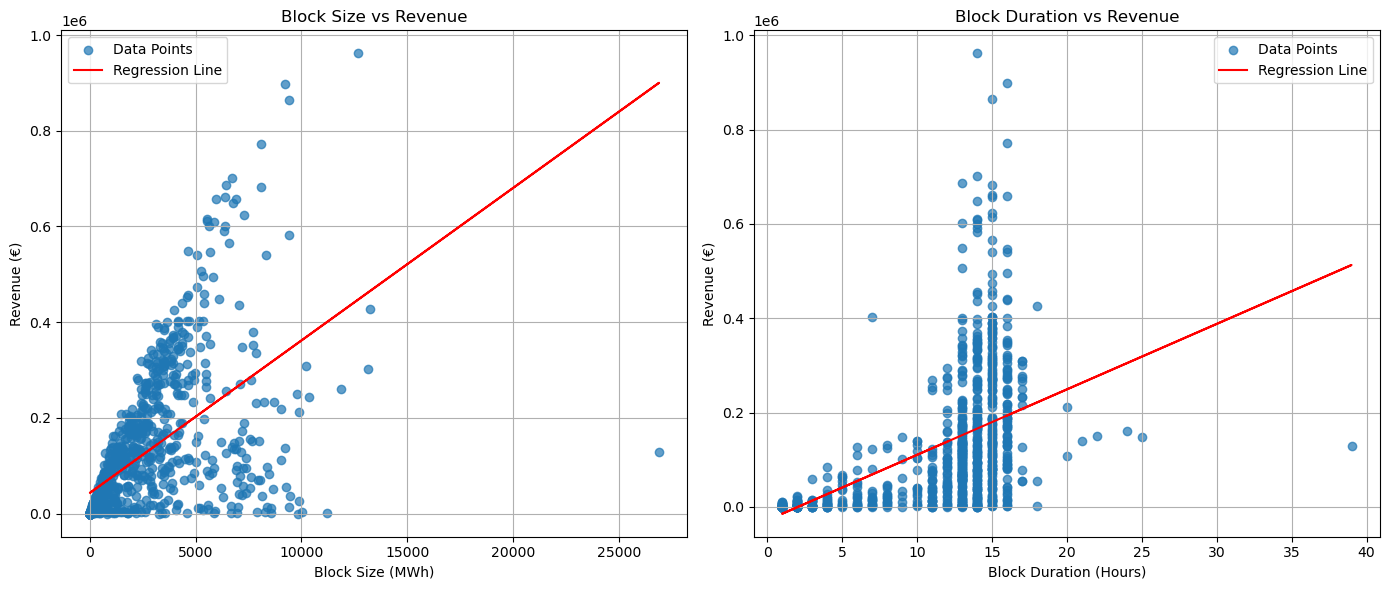

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  # Update the path to your CSV file
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 5: Filter only blocks with curtailment and calculate block characteristics
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()
block_durations = curtailment_blocks.groupby('Block_ID').size()  # Duration in hours

# Step 6: Combine block size and duration with revenue data
block_data = pd.DataFrame({
    "Block_Size (MWh)": block_totals,
    "Block_Duration (Hours)": block_durations
}).reset_index()

# Calculate revenue for each block using actual hourly prices
block_data['Revenue (€)'] = 0
for block_id in block_data['Block_ID']:
    block_hours = curtailment_blocks[curtailment_blocks['Block_ID'] == block_id]
    revenue = (block_hours['I3DIA03'] * block_hours['price']).sum()
    block_data.loc[block_data['Block_ID'] == block_id, 'Revenue (€)'] = revenue

# Step 7: Analyze correlations
correlation_size = block_data['Block_Size (MWh)'].corr(block_data['Revenue (€)'])
correlation_duration = block_data['Block_Duration (Hours)'].corr(block_data['Revenue (€)'])

print(f"Correlation between Block Size and Revenue: {correlation_size}")
print(f"Correlation between Block Duration and Revenue: {correlation_duration}")

# Step 8: Perform linear regression (Block Size vs Revenue)
slope_size, intercept_size, r_value_size, p_value_size, std_err_size = linregress(
    block_data['Block_Size (MWh)'], block_data['Revenue (€)']
)

# Step 9: Perform linear regression (Block Duration vs Revenue)
slope_duration, intercept_duration, r_value_duration, p_value_duration, std_err_duration = linregress(
    block_data['Block_Duration (Hours)'], block_data['Revenue (€)']
)

# Step 10: Visualize relationships
plt.figure(figsize=(14, 6))

# Plot: Block Size vs Revenue
plt.subplot(1, 2, 1)
plt.scatter(block_data['Block_Size (MWh)'], block_data['Revenue (€)'], alpha=0.7, label='Data Points')
plt.plot(
    block_data['Block_Size (MWh)'],
    slope_size * block_data['Block_Size (MWh)'] + intercept_size,
    color='red', label='Regression Line'
)
plt.xlabel("Block Size (MWh)")
plt.ylabel("Revenue (€)")
plt.title("Block Size vs Revenue")
plt.legend()
plt.grid(True)

# Plot: Block Duration vs Revenue
plt.subplot(1, 2, 2)
plt.scatter(block_data['Block_Duration (Hours)'], block_data['Revenue (€)'], alpha=0.7, label='Data Points')
plt.plot(
    block_data['Block_Duration (Hours)'],
    slope_duration * block_data['Block_Duration (Hours)'] + intercept_duration,
    color='red', label='Regression Line'
)
plt.xlabel("Block Duration (Hours)")
plt.ylabel("Revenue (€)")
plt.title("Block Duration vs Revenue")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


13) comparing immediate vs. strategic energy discharge strategies for different battery storage capacities, calculating and analyzing the total revenue for both methods based on hourly electricity prices and allowing delayed discharge for up to 12 hours to optimize revenue. (I am not sure if this way of analyzing is correct or not, because I did not get any new result)

In [13]:
import pandas as pd

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv" 
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 5: Filter only blocks with curtailment and calculate total curtailment per block
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Define storage capacities for analysis (MWh)
storage_capacities = [1495.4, 2255.4, 3133.1, 3998.1, 5851.4, 13219.2]  # 50% to 100% capacities
delay_window = 12  # Maximum delay window in hours for strategic discharge
results_summary = []

# Iterate through storage capacities
for battery_capacity in storage_capacities:
    discharge_rate = battery_capacity / 4  # Discharge rate (MW) for 4-hour battery
    stored_energy = block_totals.clip(upper=battery_capacity)  # Cap stored energy to battery capacity
    total_revenue_strategic = 0
    total_revenue_immediate = 0
    soc = 0  # Battery state of charge
    block_results = []

    for block_id, energy in stored_energy.items():
        # Get the block's end time
        block_data = curtailment_blocks[curtailment_blocks['Block_ID'] == block_id]
        end_time = block_data['new_index'].max()

        # Calculate immediate discharge revenue
        immediate_revenue = 0
        discharge_start_immediate = end_time + pd.Timedelta(hours=1)
        for i in range(4):
            discharge_time = discharge_start_immediate + pd.Timedelta(hours=i)
            price = curt_data[curt_data['new_index'] == discharge_time]['price'].mean()
            if pd.notna(price):
                immediate_revenue += min(discharge_rate, energy / 4) * price
        total_revenue_immediate += immediate_revenue

        # Calculate strategic discharge revenue
        discharge_revenue = 0
        discharge_start_strategic = None
        for i in range(1, delay_window + 1):
            discharge_time = end_time + pd.Timedelta(hours=i)
            price = curt_data[curt_data['new_index'] == discharge_time]['price'].mean()
            if pd.notna(price) and (soc + energy) <= battery_capacity:
                soc += energy
                discharge_start_strategic = discharge_time
                for j in range(4):
                    discharge_hour = discharge_time + pd.Timedelta(hours=j)
                    hour_price = curt_data[curt_data['new_index'] == discharge_hour]['price'].mean()
                    if pd.notna(hour_price):
                        discharge_revenue += min(discharge_rate, energy / 4) * hour_price
                soc = max(0, soc - energy)  # Update state of charge after discharge
                break  # Exit once a valid discharge window is found
        total_revenue_strategic += discharge_revenue

        # Append block results
        block_results.append({
            "Block_ID": block_id,
            "Stored_Energy (MWh)": energy,
            "Immediate_Revenue (€)": immediate_revenue,
            "Strategic_Revenue (€)": discharge_revenue,
            "Discharge_Start_Strategic": discharge_start_strategic,
        })

    # Append capacity results
    results_summary.append({
        "Battery_Capacity (MWh)": battery_capacity,
        "Total_Revenue_Immediate (€)": total_revenue_immediate,
        "Total_Revenue_Strategic (€)": total_revenue_strategic,
        "Block_Results": block_results
    })

# Convert summary to a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Battery_Capacity (MWh)": [result["Battery_Capacity (MWh)"] for result in results_summary],
    "Total_Revenue_Immediate (€)": [result["Total_Revenue_Immediate (€)"] for result in results_summary],
    "Total_Revenue_Strategic (€)": [result["Total_Revenue_Strategic (€)"] for result in results_summary],
})

# Display the comparison results
print("Comparison of Immediate and Strategic Discharge Revenue:")
print(comparison_df)

# Optional: Save the comparison results to a CSV file
comparison_df.to_csv("discharge_revenue_comparison.csv", index=False)


Comparison of Immediate and Strategic Discharge Revenue:
   Battery_Capacity (MWh)  Total_Revenue_Immediate (€)  \
0                  1495.4                 7.924601e+07   
1                  2255.4                 1.079337e+08   
2                  3133.1                 1.330174e+08   
3                  3998.1                 1.494377e+08   
4                  5851.4                 1.683024e+08   
5                 13219.2                 1.814539e+08   

   Total_Revenue_Strategic (€)  
0                 7.924601e+07  
1                 1.079337e+08  
2                 1.330174e+08  
3                 1.494377e+08  
4                 1.683024e+08  
5                 1.814539e+08  


14) Analyzing the impact of battery round-trip efficiency (90%) on revenue and energy losses, calculating adjusted total revenue and energy loss for different battery storage capacities (50% to 100%) based on hourly electricity prices. 

In [14]:
import pandas as pd

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Convert all values in "I3DIA03" to positive
curt_data['I3DIA03'] = curt_data['I3DIA03'].abs()

# Step 4: Identify blocks of consecutive hours with programmed curtailment
curt_data['Curtailment_Flag'] = curt_data['I3DIA03'] > 0
curt_data['Block_ID'] = (curt_data['Curtailment_Flag'] != curt_data['Curtailment_Flag'].shift()).cumsum()

# Step 5: Filter only blocks with curtailment and calculate total curtailment per block
curtailment_blocks = curt_data[curt_data['Curtailment_Flag']]
block_totals = curtailment_blocks.groupby('Block_ID')['I3DIA03'].sum()

# Define storage capacities for analysis (MWh)
storage_capacities = [1495.4, 2255.4, 3133.1, 3998.1, 5851.4, 13219.2]  # 50% to 100% capacities
round_trip_efficiency = 0.90  # Assume 90% round-trip efficiency
results_summary = []

# Iterate through storage capacities
for battery_capacity in storage_capacities:
    discharge_rate = battery_capacity / 4  # Discharge rate (MW) for 4-hour battery
    stored_energy = block_totals.clip(upper=battery_capacity)  # Cap stored energy to battery capacity
    total_revenue_adjusted = 0
    total_energy_loss = 0

    for block_id, energy in stored_energy.items():
        # Apply round-trip efficiency to calculate effective discharged energy
        effective_energy = energy * round_trip_efficiency
        energy_loss = energy * (1 - round_trip_efficiency)
        total_energy_loss += energy_loss

        # Calculate revenue based on effective energy and hourly prices
        block_data = curtailment_blocks[curtailment_blocks['Block_ID'] == block_id]
        end_time = block_data['new_index'].max()
        revenue = 0

        discharge_start = end_time + pd.Timedelta(hours=1)
        for i in range(4):
            discharge_time = discharge_start + pd.Timedelta(hours=i)
            price = curt_data[curt_data['new_index'] == discharge_time]['price'].mean()
            if pd.notna(price):
                revenue += min(discharge_rate, effective_energy / 4) * price

        total_revenue_adjusted += revenue

    # Append results for this capacity
    results_summary.append({
        "Battery_Capacity (MWh)": battery_capacity,
        "Total_Revenue_Adjusted (€)": total_revenue_adjusted,
        "Total_Energy_Loss (MWh)": total_energy_loss
    })

# Convert summary to a DataFrame
comparison_df = pd.DataFrame(results_summary)

# Display the results
print("Battery Efficiency Analysis Results:")
print(comparison_df)



Battery Efficiency Analysis Results:
   Battery_Capacity (MWh)  Total_Revenue_Adjusted (€)  Total_Energy_Loss (MWh)
0                  1495.4                7.132141e+07                 85722.52
1                  2255.4                9.714034e+07                117598.44
2                  3133.1                1.197156e+08                146041.73
3                  3998.1                1.344939e+08                165714.38
4                  5851.4                1.514722e+08                190460.16
5                 13219.2                1.633085e+08                210325.04


In [3]:
import pandas as pd

# Storage capacities in MWh for different percentages of blocks stored
storage_data = {
    "Percentage of Blocks Stored": ["50%", "60%", "70%", "80%", "90%", "100%"],
    "Storage Capacity (MWh)": [1495.4, 2264.4, 3139.0, 4011.5, 5857.3, 13219.2]
}

# Battery cost scenarios in €/MWh
cost_per_mwh = {
    "Low (150k €/MWh)": 150000,
    "Medium (200k €/MWh)": 200000,
    "High (250k €/MWh)": 250000
}

# Create DataFrame
df = pd.DataFrame(storage_data)

# Calculate total investment for each cost scenario
for label, cost in cost_per_mwh.items():
    df[label + " (€)"] = df["Storage Capacity (MWh)"] * cost

# Display the result
print(df)


  Percentage of Blocks Stored  Storage Capacity (MWh)  Low (150k €/MWh) (€)  \
0                         50%                  1495.4          2.243100e+08   
1                         60%                  2264.4          3.396600e+08   
2                         70%                  3139.0          4.708500e+08   
3                         80%                  4011.5          6.017250e+08   
4                         90%                  5857.3          8.785950e+08   
5                        100%                 13219.2          1.982880e+09   

   Medium (200k €/MWh) (€)  High (250k €/MWh) (€)  
0             2.990800e+08           3.738500e+08  
1             4.528800e+08           5.661000e+08  
2             6.278000e+08           7.847500e+08  
3             8.023000e+08           1.002875e+09  
4             1.171460e+09           1.464325e+09  
5             2.643840e+09           3.304800e+09  


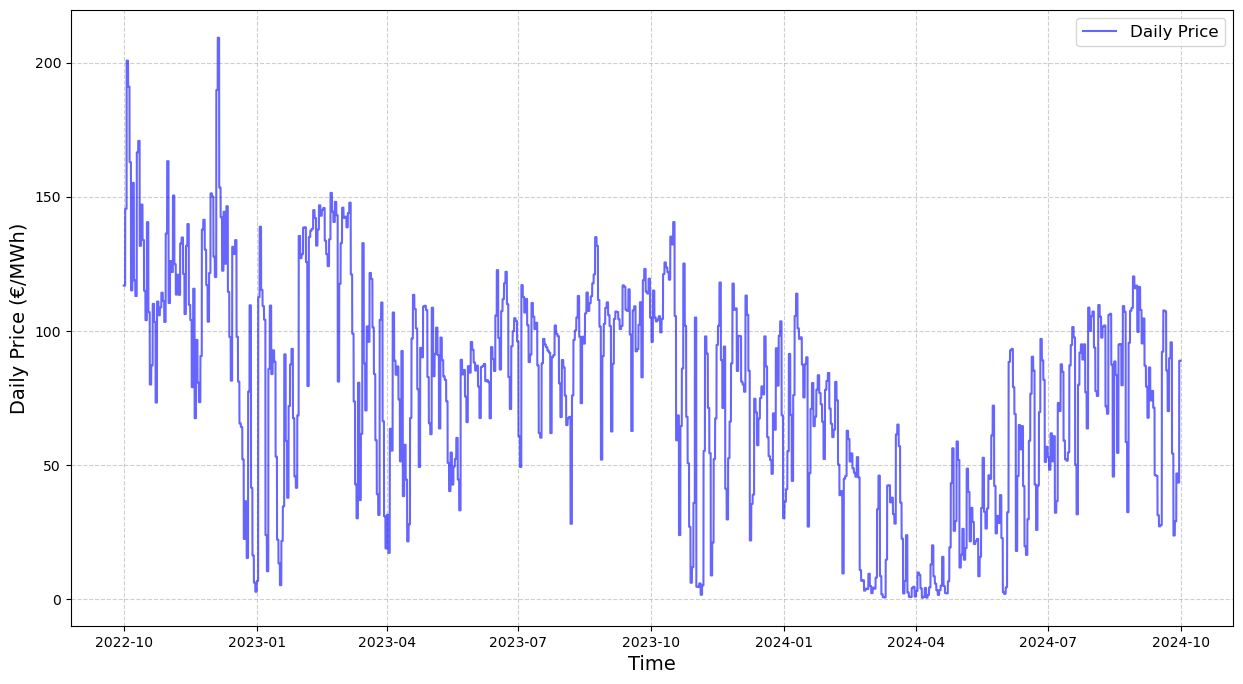

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"  
curt_data = pd.read_csv(file_path)

# Step 2: Convert 'new_index' to datetime
curt_data['new_index'] = pd.to_datetime(curt_data['new_index'])

# Step 3: Plot the daily price without the trend line
plt.figure(figsize=(15, 8))
plt.plot(curt_data['new_index'], curt_data['dayly_price'], label='Daily Price', color='blue', alpha=0.6)

# Add labels, title, and grid
plt.xlabel('Time', fontsize=14)
plt.ylabel('Daily Price (€/MWh)', fontsize=14)
plt.title('', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Save the plot to the Desktop as PNG
output_path = r"C:\Users\hp\Desktop\daily_price_plot.png"
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()
